<a href="https://colab.research.google.com/github/Ebubechukwu579/Predictive-Modelling-for-COVID-19-in-Public-Health/blob/main/Emmanuel_Oguh_Covid19_Recommendation_Model_(3MTT_CAPSTONE_PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from prophet import Prophet

# Loading the Selected Datasets
Covid19_First_Dataset = pd.read_csv('/content/worldometer_data.csv')
Covid19_Second_Dataset = pd.read_csv('/content/full_grouped.csv')

# Displaying the first 10 rows
Covid19_First_Dataset.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


In [ ]:
Covid19_Second_Dataset.head(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe


In [ ]:
# Perform Data Profiling For The Selected Datasets
# For Information about the Datasets
Covid19_First_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [ ]:
Covid19_Second_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [ ]:
# For how many Columns and Rows in the two Datasets
Covid19_First_Dataset.shape

(209, 16)

In [ ]:
Covid19_Second_Dataset.shape

(35156, 10)

In [ ]:
# For checking presence of Empty cells
Covid19_First_Dataset.isnull().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,205
TotalDeaths,21
NewDeaths,206
TotalRecovered,4
NewRecovered,206
ActiveCases,4


In [ ]:
Covid19_Second_Dataset.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [ ]:
# For Descriptive Statistics About the Selected Datasets
Covid19_First_Dataset.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [ ]:
Covid19_Second_Dataset.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [ ]:
# Preprocessing of The Selected Datasets
# Handling of missing datapoints both in numerical and categorical columns in the first dataset(Covid19_First_Dataset)
# Replacing Columns with 0/ZERO for Sparse Column like NEW CASES, NEW DEATHS and ACTIVE CASES
Covid19_First_Dataset = Covid19_First_Dataset.copy()
Covid19_First_Dataset['NewCases'] = Covid19_First_Dataset['NewCases'].fillna(0)
Covid19_First_Dataset['NewDeaths'] = Covid19_First_Dataset['NewDeaths'].fillna(0)
Covid19_First_Dataset['ActiveCases'] = Covid19_First_Dataset['ActiveCases'].fillna(0)
Covid19_First_Dataset.isnull().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,0
TotalDeaths,21
NewDeaths,0
TotalRecovered,4
NewRecovered,206
ActiveCases,0


In [ ]:
# Replace with the MEAN for Columns with numeric data
columns_to_fill = [
    'Population', 'TotalDeaths', 'TotalRecovered', 'NewRecovered',
    'Serious,Critical','Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop'
]
for column in columns_to_fill:
    Covid19_First_Dataset[column] = Covid19_First_Dataset[column].fillna(Covid19_First_Dataset[column].mean())

In [ ]:
Covid19_First_Dataset.isnull().sum()

,0
Country/Region,0
Continent,1
Population,0
TotalCases,0
NewCases,0
TotalDeaths,0
NewDeaths,0
TotalRecovered,0
NewRecovered,0
ActiveCases,0


In [ ]:
# Handling categorical columns in the Covid19_First_Dataset with the UNKNOWN
categorical_columns = ['Continent', 'WHO Region']
for column in categorical_columns:
    Covid19_First_Dataset[column] = Covid19_First_Dataset[column].fillna('Unknown')
Covid19_First_Dataset.isnull().sum()

,0
Country/Region,0
Continent,0
Population,0
TotalCases,0
NewCases,0
TotalDeaths,0
NewDeaths,0
TotalRecovered,0
NewRecovered,0
ActiveCases,0


In [ ]:
# Perform FEATURE ENGINEERING to create and Add new columns to predict on with the Built Model
# For the Covid19_First_Dataset, we will create and add columns for MORTALITY RATIO and POTENTIAL CASE DENSITY
# For the Covid19_Second_Dataset, we will create and add columns for MONTH, MONTH NAME and DAILY GROWTH RATE
# For the Covid19_First-Dataset
Covid19_First_Dataset['Mortality Ratio'] = Covid19_First_Dataset['TotalDeaths'] / Covid19_First_Dataset['TotalCases']
Covid19_First_Dataset['PotentialCaseDensity'] = Covid19_First_Dataset['TotalCases'] / Covid19_First_Dataset['Population']
Covid19_First_Dataset.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Mortality Ratio,PotentialCaseDensity
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2.576668e+06,1706.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,0.032353,0.015194
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2.047660e+06,1706.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,0.033810,0.013716
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1.377384e+06,1706.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,0.020558,0.001466
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,6.763570e+05,1706.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,0.016752,0.005974
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,3.873160e+05,1706.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,0.017845,0.009063
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,3.088480e+05,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas,0.109181,0.003585
6,Peru,South America,3.301632e+07,455409,0.0,20424.0,0.0,3.103370e+05,1706.0,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas,0.044848,0.013793
7,Chile,South America,1.913251e+07,366671,0.0,9889.0,0.0,3.401680e+05,1706.0,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas,0.026970,0.019165
8,Colombia,South America,5.093626e+07,357710,0.0,11939.0,0.0,1.923550e+05,1706.0,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas,0.033376,0.007023
9,Spain,Europe,4.675665e+07,354530,0.0,28500.0,0.0,5.887898e+04,1706.0,0.0,617.0,7582.0,610.0,7064329.0,151087.0,Europe,0.080388,0.007582


In [ ]:
#. For the second Dataset we add DAILY GROWTH RATE Column
Covid19_Second_Dataset['Confirmed'] = pd.to_numeric(Covid19_Second_Dataset['Confirmed'], errors='coerce')
Covid19_Second_Dataset['DailyGrowthRate'] = Covid19_Second_Dataset['Confirmed'].pct_change() * 100
Covid19_Second_Dataset.loc[:,'DailyGrowthRate'] = Covid19_Second_Dataset['DailyGrowthRate'].fillna(0)
Covid19_Second_Dataset.head(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,DailyGrowthRate
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,0.0
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,0.0
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,0.0
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,0.0
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,0.0
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas,0.0
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas,0.0
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe,0.0
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific,0.0
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe,0.0


In [ ]:
# For Second Dataset we create and add the MONTH and MonthName columns from the DATE column
Covid19_Second_Dataset['Date'] = pd.to_datetime(Covid19_Second_Dataset['Date'])
Covid19_Second_Dataset['Month'] = Covid19_Second_Dataset['Date'].dt.month
Covid19_Second_Dataset['MonthName'] = Covid19_Second_Dataset['Date'].dt.month_name()
Covid19_Second_Dataset.head(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,DailyGrowthRate,Month,MonthName
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,0.0,1,January
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,0.0,1,January
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,0.0,1,January
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,0.0,1,January
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,0.0,1,January
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas,0.0,1,January
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas,0.0,1,January
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe,0.0,1,January
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific,0.0,1,January
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe,0.0,1,January


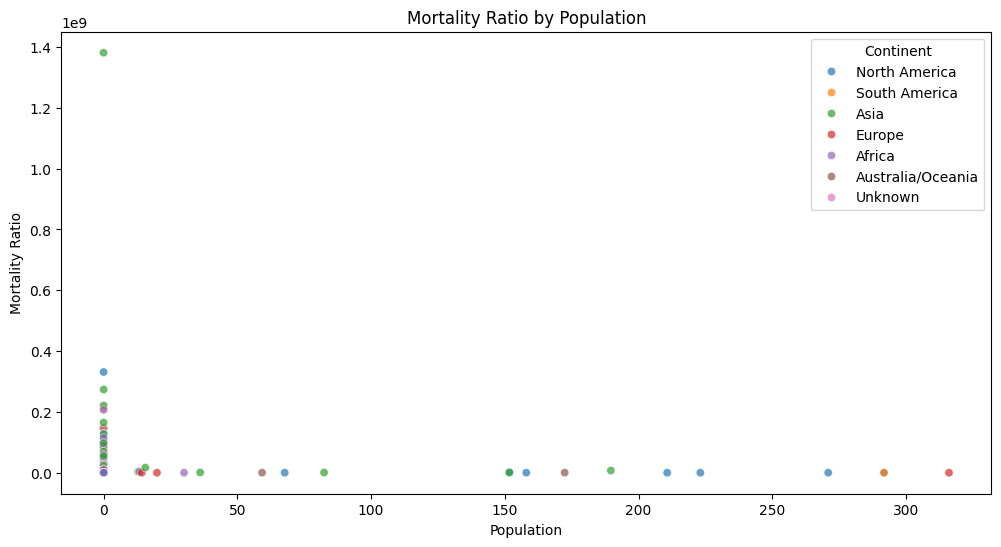

In [ ]:
# PERFORMING VISUALIZATION ANALYSIS FOR THE TWO DATASETS
# FOR THE FIRST DATASET
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Covid19_First_Dataset, x='Mortality Ratio', y='Population', hue='Continent', alpha=0.7)
plt.title("Mortality Ratio by Population")
plt.ylabel("Mortality Ratio")
plt.xlabel("Population")
plt.show()

<ipython-input-377-33d53a2bd98e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_countries, x='Country/Region', y='Mortality Ratio', ci=None)


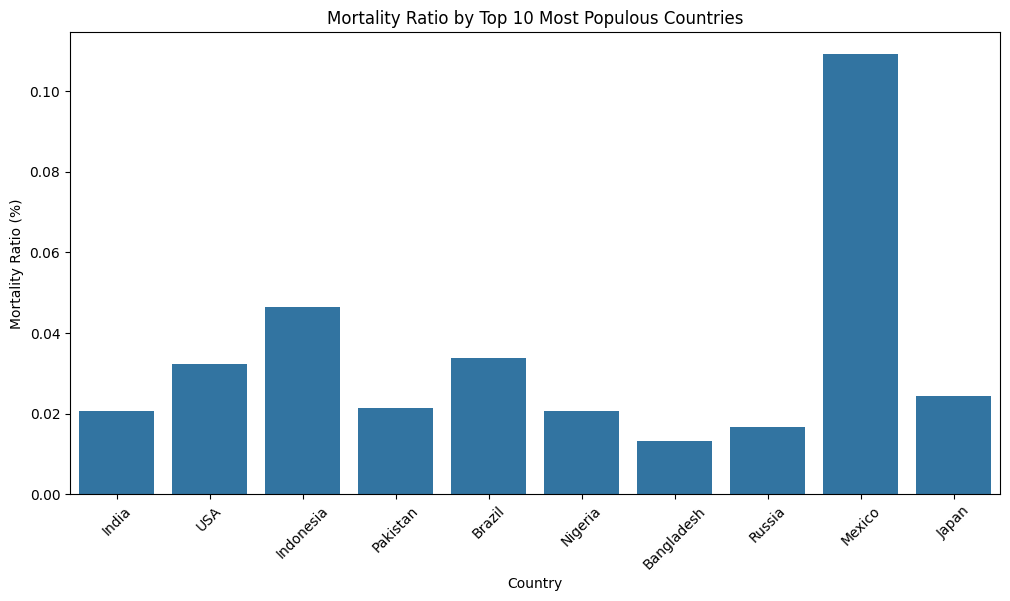

In [ ]:
top_countries = Covid19_First_Dataset.nlargest(10, 'Population')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Country/Region', y='Mortality Ratio', ci=None)
plt.title("Mortality Ratio by Top 10 Most Populous Countries")
plt.ylabel("Mortality Ratio (%)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

<ipython-input-378-1e7d453308ee>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Covid19_First_Dataset, x='Continent', y='Mortality Ratio', ci=None)


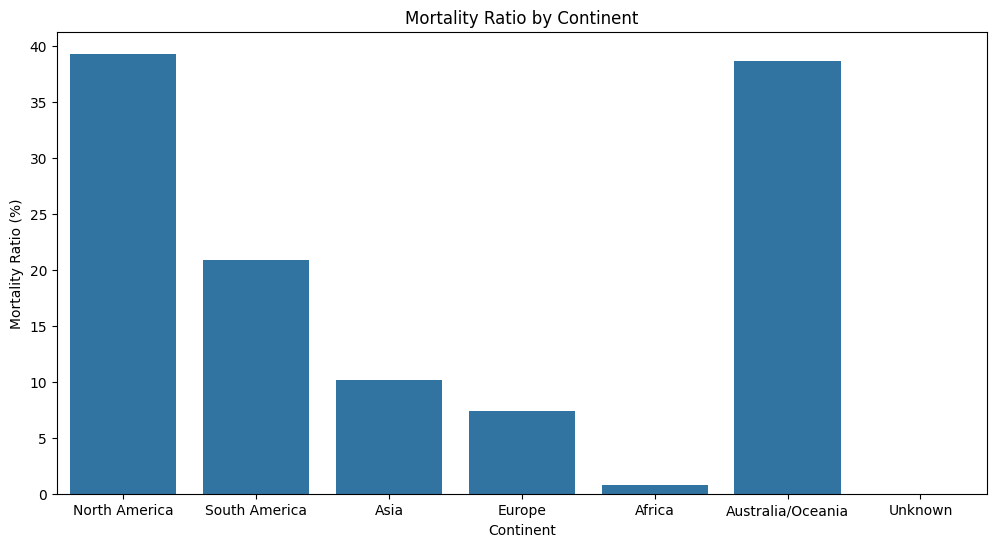

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=Covid19_First_Dataset, x='Continent', y='Mortality Ratio', ci=None)
plt.title("Mortality Ratio by Continent")
plt.ylabel("Mortality Ratio (%)")
plt.xlabel("Continent")
plt.show()

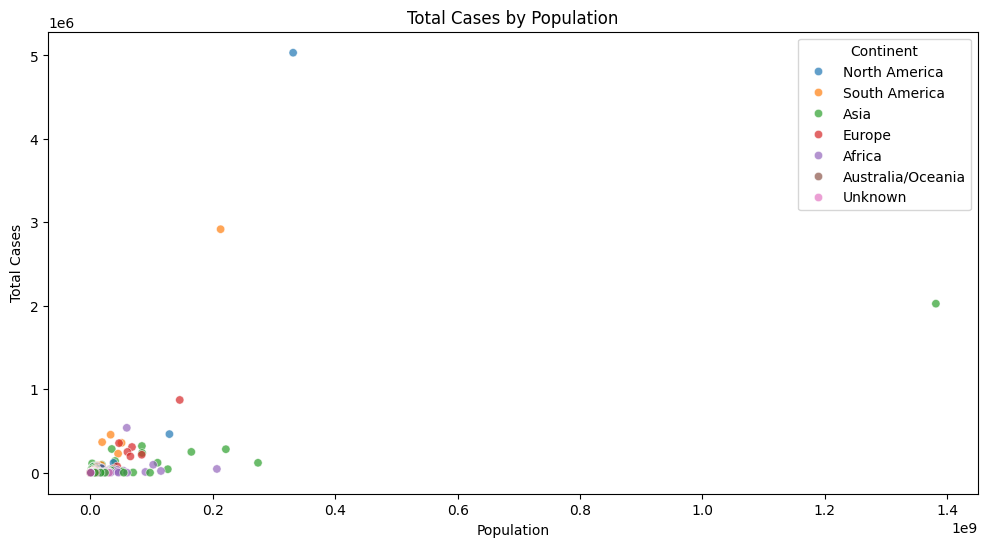

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Covid19_First_Dataset, x='Population', y='TotalCases', hue='Continent', alpha=0.7)
plt.title("Total Cases by Population")
plt.ylabel("Total Cases")
plt.xlabel("Population")
plt.show()

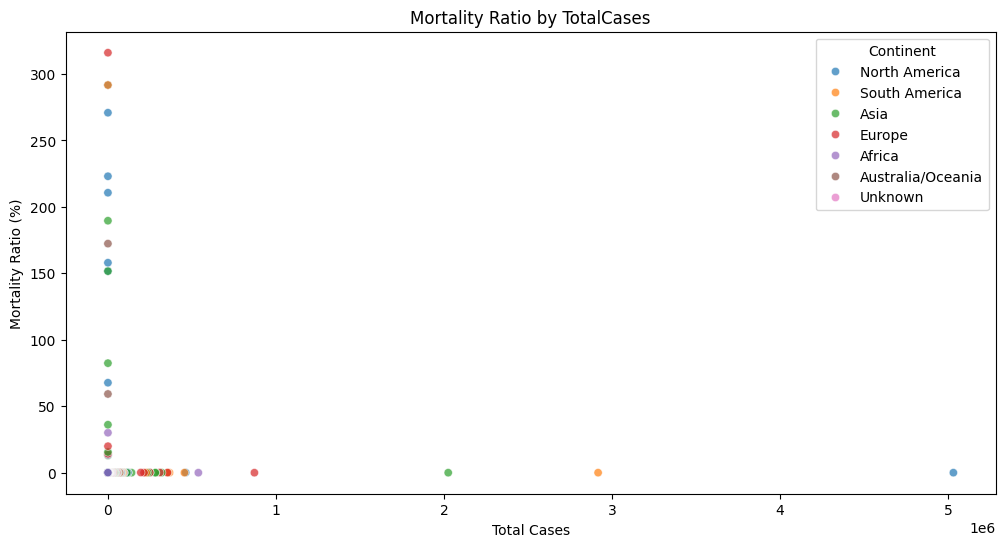

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Covid19_First_Dataset, x='TotalCases', y='Mortality Ratio', hue='Continent', alpha=0.7)
plt.title("Mortality Ratio by TotalCases")
plt.ylabel("Mortality Ratio (%)")
plt.xlabel("Total Cases")
plt.show()

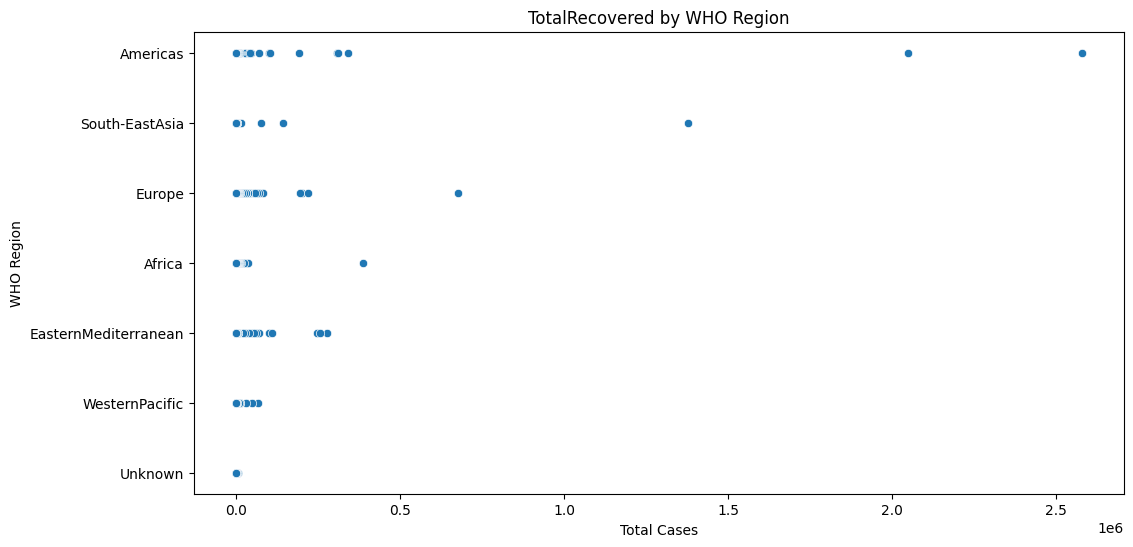

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Covid19_First_Dataset, x='TotalRecovered', y='WHO Region')
plt.title("TotalRecovered by WHO Region")
plt.ylabel("WHO Region")
plt.xlabel("Total Cases")
plt.show()

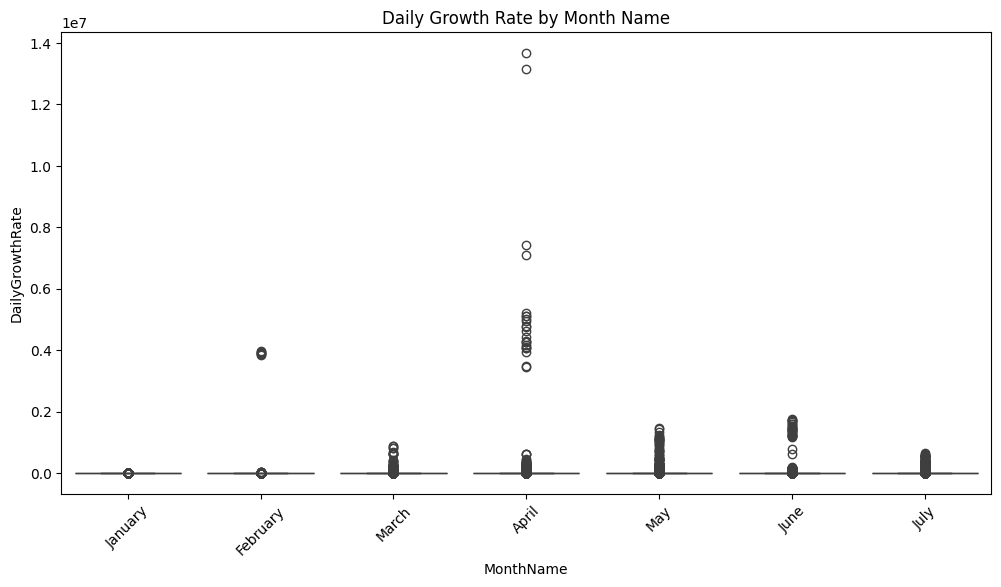

In [ ]:
# FOR THE SECOND DATASET
plt.figure(figsize=(12, 6))
sns.boxplot(data=Covid19_Second_Dataset, x='MonthName', y='DailyGrowthRate')
plt.title("Daily Growth Rate by Month Name")
plt.xlabel("MonthName")
plt.ylabel("DailyGrowthRate")
plt.xticks(rotation=45)
plt.show()

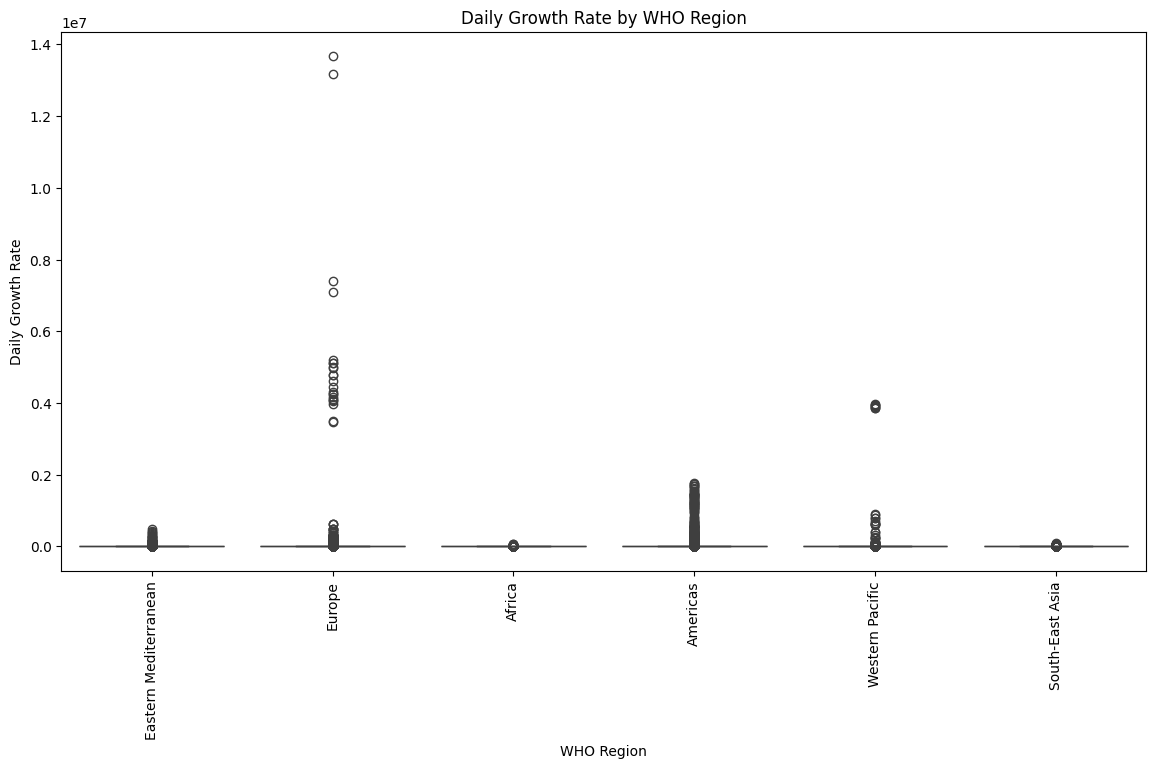

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=Covid19_Second_Dataset, x='WHO Region', y='DailyGrowthRate')
plt.title("Daily Growth Rate by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Daily Growth Rate")
plt.xticks(rotation=90)
plt.show()

<ipython-input-384-f26baa3ad193>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Covid19_Second_Dataset, x='WHO Region', y='Confirmed', ci=None)


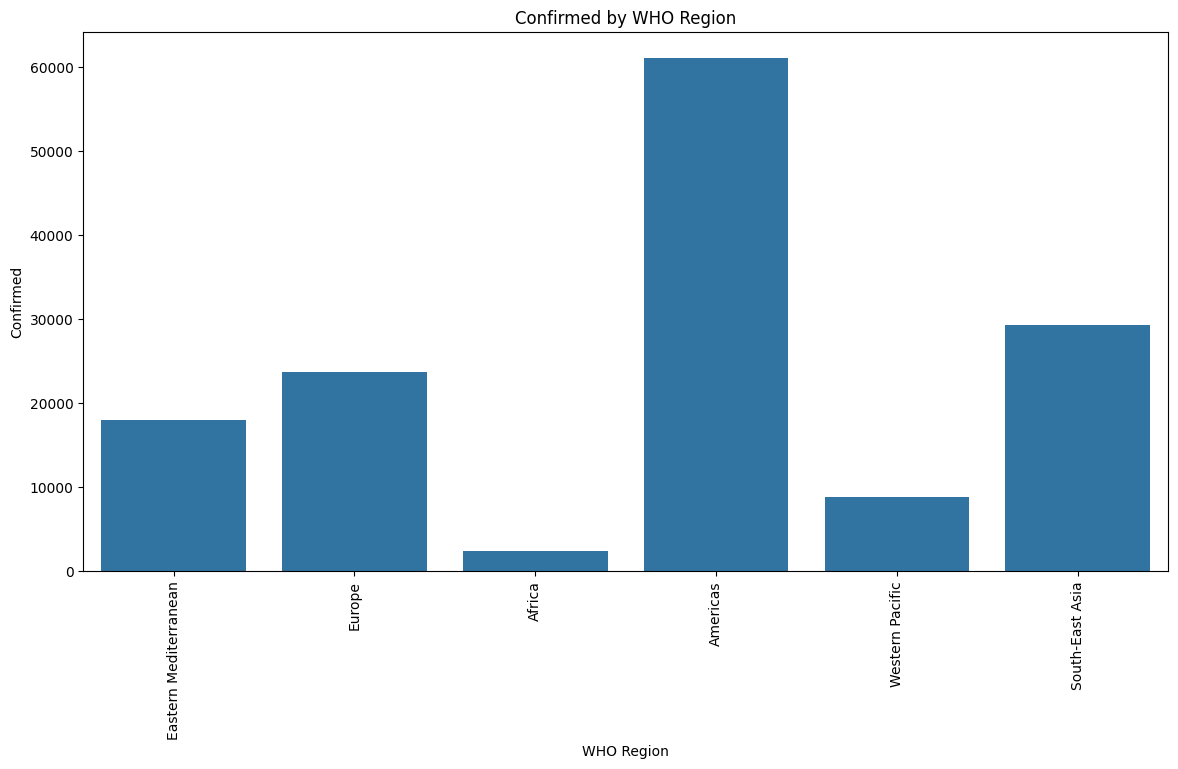

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=Covid19_Second_Dataset, x='WHO Region', y='Confirmed', ci=None)
plt.title("Confirmed by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Confirmed")
plt.xticks(rotation=90)
plt.show()

In [ ]:
Covid19_Second_Dataset.head(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,DailyGrowthRate,Month,MonthName
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,0.0,1,January
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,0.0,1,January
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,0.0,1,January
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,0.0,1,January
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,0.0,1,January
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas,0.0,1,January
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas,0.0,1,January
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe,0.0,1,January
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific,0.0,1,January
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe,0.0,1,January


In [ ]:
# Convert Categorical columns by Label Encoding
for column in Covid19_Second_Dataset.select_dtypes(include=['object']):
    encoder = LabelEncoder()
    Covid19_Second_Dataset[column] = encoder.fit_transform(Covid19_Second_Dataset[column].astype(str))
    Covid19_Second_Dataset[column] = Covid19_Second_Dataset[column].astype(int)
Covid19_Second_Dataset.head(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,DailyGrowthRate,Month,MonthName
0,2020-01-22,0,0,0,0,0,0,0,0,2,0.0,1,2
1,2020-01-22,1,0,0,0,0,0,0,0,3,0.0,1,2
2,2020-01-22,2,0,0,0,0,0,0,0,0,0.0,1,2
3,2020-01-22,3,0,0,0,0,0,0,0,3,0.0,1,2
4,2020-01-22,4,0,0,0,0,0,0,0,0,0.0,1,2
5,2020-01-22,5,0,0,0,0,0,0,0,1,0.0,1,2
6,2020-01-22,6,0,0,0,0,0,0,0,1,0.0,1,2
7,2020-01-22,7,0,0,0,0,0,0,0,3,0.0,1,2
8,2020-01-22,8,0,0,0,0,0,0,0,5,0.0,1,2
9,2020-01-22,9,0,0,0,0,0,0,0,3,0.0,1,2


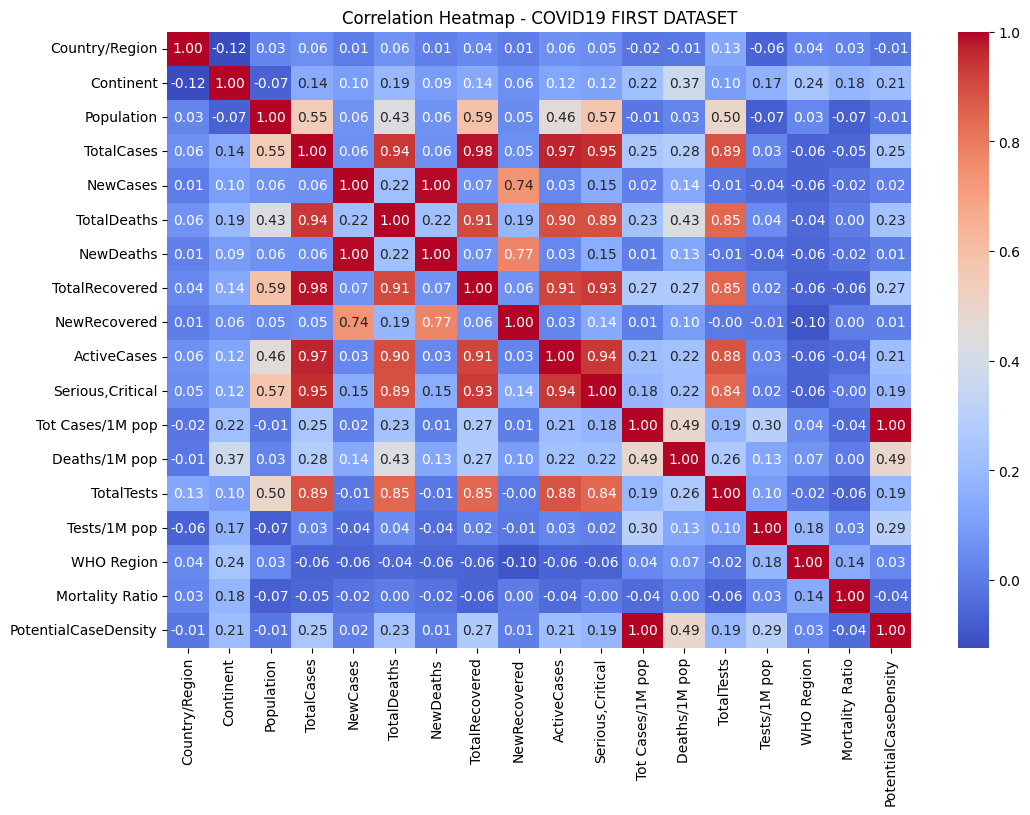

In [ ]:
# CORRELATION ANALYSIS FOR THE TWO DATASETS
# FOR THE FIRST DATASET, we will first convert all columns to numerical before visualizing with heatmap
encoded_dataset1 = Covid19_First_Dataset.copy()
label_encoder = LabelEncoder()
for col in Covid19_First_Dataset.select_dtypes(include=['object']).columns:
    encoded_dataset1[col] = label_encoder.fit_transform(Covid19_First_Dataset[col])
correlation_matrix1 = encoded_dataset1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap - COVID19 FIRST DATASET")
plt.show()

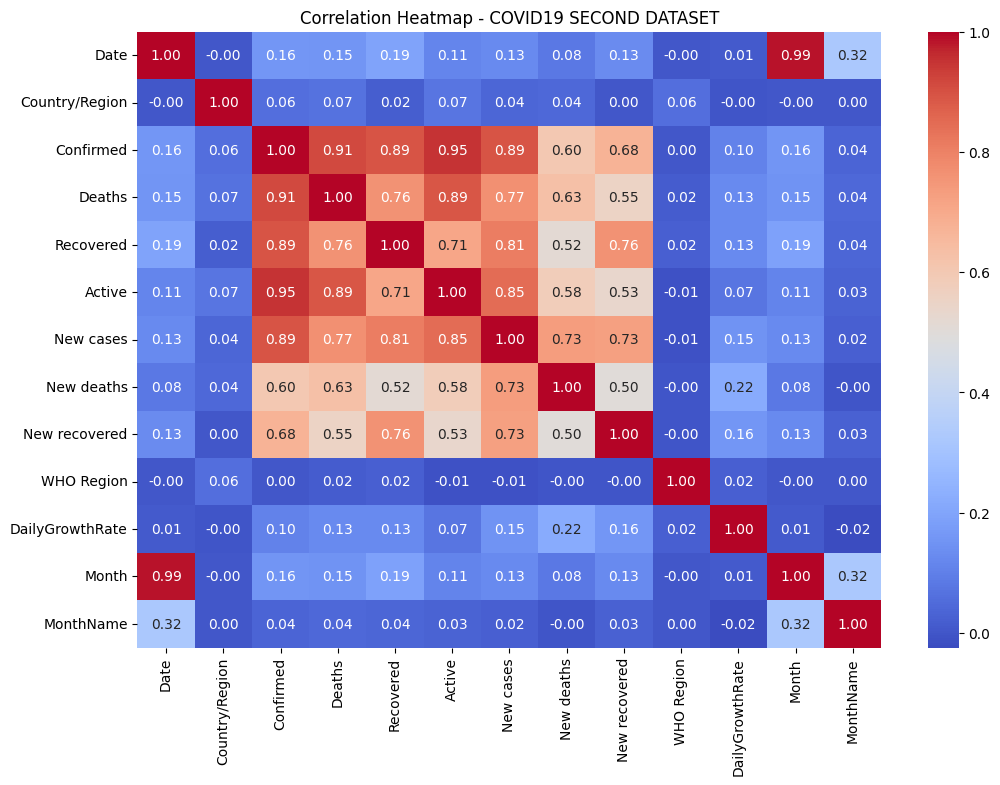

In [ ]:
# FOR SECOND DATASET
correlation_matrix2 = Covid19_Second_Dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap - COVID19 SECOND DATASET")
plt.show()

In [ ]:
# MODEL BUILDING FOR TIME-SERIES AND CLASSIFICATION ANALYSIS USING MACHINE LEARNING ALGORITHMS
# FOR TIME-SERIES ANALYSIS
# First we Display Covid19 Second Dataset for viewing
Covid19_Second_Dataset.head(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,DailyGrowthRate,Month,MonthName
0,2020-01-22,0,0,0,0,0,0,0,0,2,0.0,1,2
1,2020-01-22,1,0,0,0,0,0,0,0,3,0.0,1,2
2,2020-01-22,2,0,0,0,0,0,0,0,0,0.0,1,2
3,2020-01-22,3,0,0,0,0,0,0,0,3,0.0,1,2
4,2020-01-22,4,0,0,0,0,0,0,0,0,0.0,1,2
5,2020-01-22,5,0,0,0,0,0,0,0,1,0.0,1,2
6,2020-01-22,6,0,0,0,0,0,0,0,1,0.0,1,2
7,2020-01-22,7,0,0,0,0,0,0,0,3,0.0,1,2
8,2020-01-22,8,0,0,0,0,0,0,0,5,0.0,1,2
9,2020-01-22,9,0,0,0,0,0,0,0,3,0.0,1,2


In [ ]:
print(time_series_data[time_series_data['y'].isin([float('inf'), float('-inf')])])

Empty DataFrame
Columns: [ds, y]
Index: []


In [ ]:
time_series_data['y'] = time_series_data['y'].replace([float('inf'), float('-inf')], pd.NA)
time_series_data['y'] = pd.to_numeric(time_series_data['y'], errors='coerce')
time_series_data['y'] = time_series_data['y'].fillna(time_series_data['y'].median())
time_series_data = time_series_data.infer_objects()
model = Prophet()
model.fit(time_series_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvvo652a/2ucpv4kv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvvo652a/v8w1i17x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38961', 'data', 'file=/tmp/tmpcvvo652a/2ucpv4kv.json', 'init=/tmp/tmpcvvo652a/v8w1i17x.json', 'output', 'file=/tmp/tmpcvvo652a/prophet_modelitperdso/prophet_model-20241129004059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:41:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


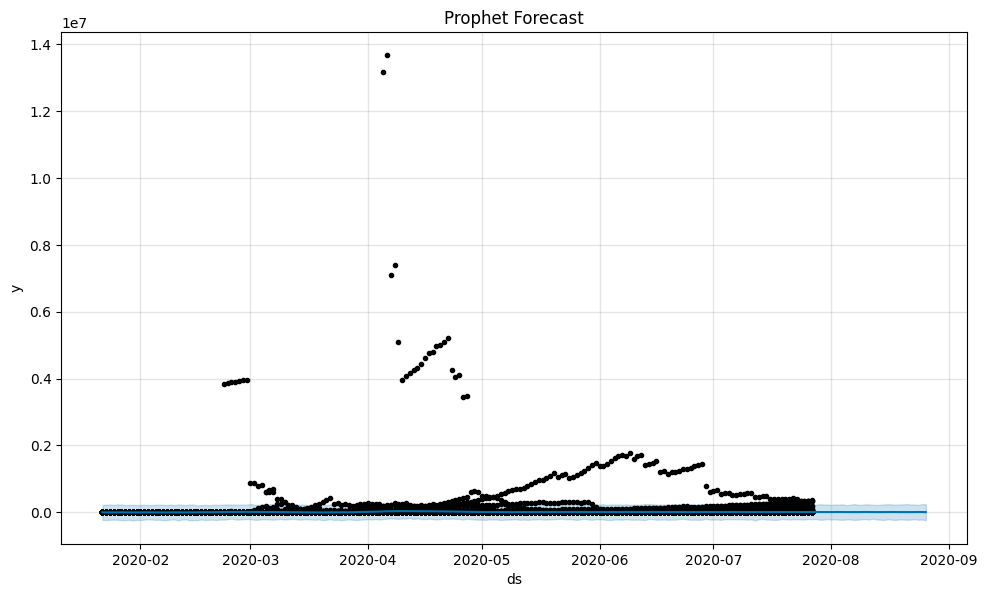

In [ ]:
future_dates = model.make_future_dataframe(periods=30)  # 30 days into the future
forecast = model.predict(future_dates)
model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

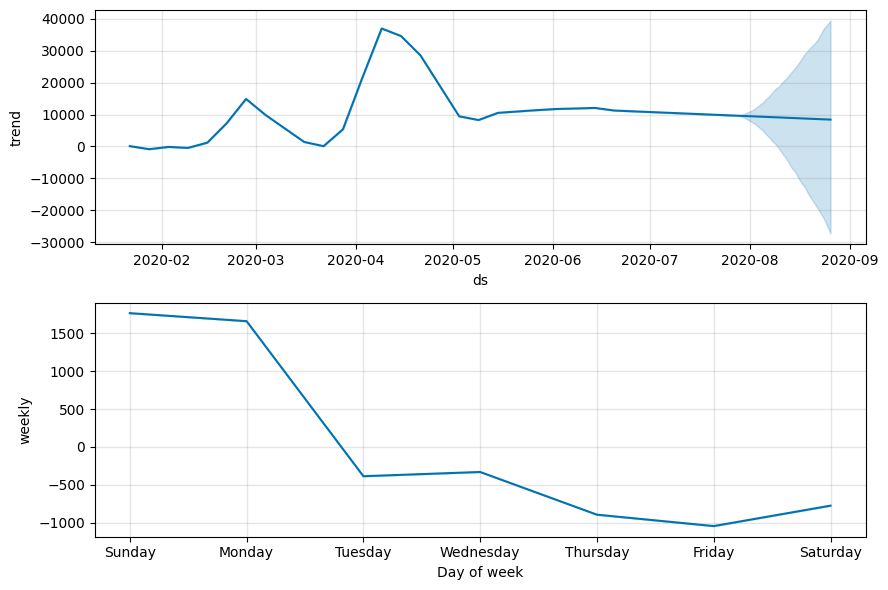

In [ ]:
model.plot_components(forecast)
plt.show()

In [ ]:
# MODEL BUILDING FOR NEWCASES
new_cases_data = Covid19_Second_Dataset[['Date', 'New cases']].copy()
new_cases_data.rename(columns={'Date': 'ds', 'New cases': 'y'}, inplace=True)
new_cases_data['y'] = new_cases_data['y'].ffill()
new_cases_data['ds'] = pd.to_datetime(new_cases_data['ds'])
new_cases_model = Prophet()
new_cases_model.fit(new_cases_data)

future_dates_new_cases = new_cases_model.make_future_dataframe(periods=30)
print("Visualizing forecast for New Cases")



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvvo652a/02c8241k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvvo652a/ud7vi3tu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98182', 'data', 'file=/tmp/tmpcvvo652a/02c8241k.json', 'init=/tmp/tmpcvvo652a/ud7vi3tu.json', 'output', 'file=/tmp/tmpcvvo652a/prophet_model99oa_1mj/prophet_model-20241129004116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:41:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:41:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Visualizing forecast for New Cases


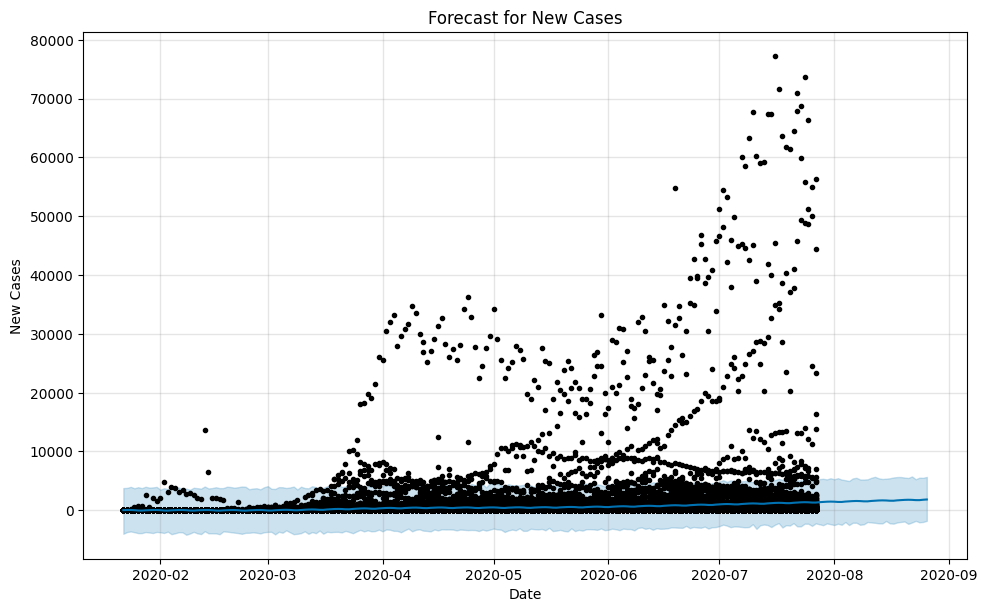

In [ ]:
forecast_new_cases = new_cases_model.predict(future_dates_new_cases)
fig_new_cases = new_cases_model.plot(forecast_new_cases)
plt.title("Forecast for New Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

In [ ]:
new_deaths_data = Covid19_Second_Dataset[['Date', 'New deaths']].copy()
new_deaths_data.rename(columns={'Date': 'ds', 'New deaths': 'y'}, inplace=True)
new_deaths_data['y'] = new_deaths_data['y'].ffill()
new_deaths_model = Prophet()
new_deaths_model.fit(new_deaths_data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvvo652a/swkknh4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcvvo652a/h1g5pgzx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22432', 'data', 'file=/tmp/tmpcvvo652a/swkknh4f.json', 'init=/tmp/tmpcvvo652a/h1g5pgzx.json', 'output', 'file=/tmp/tmpcvvo652a/prophet_model76pj1aje/prophet_model-20241129004126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:41:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:41:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


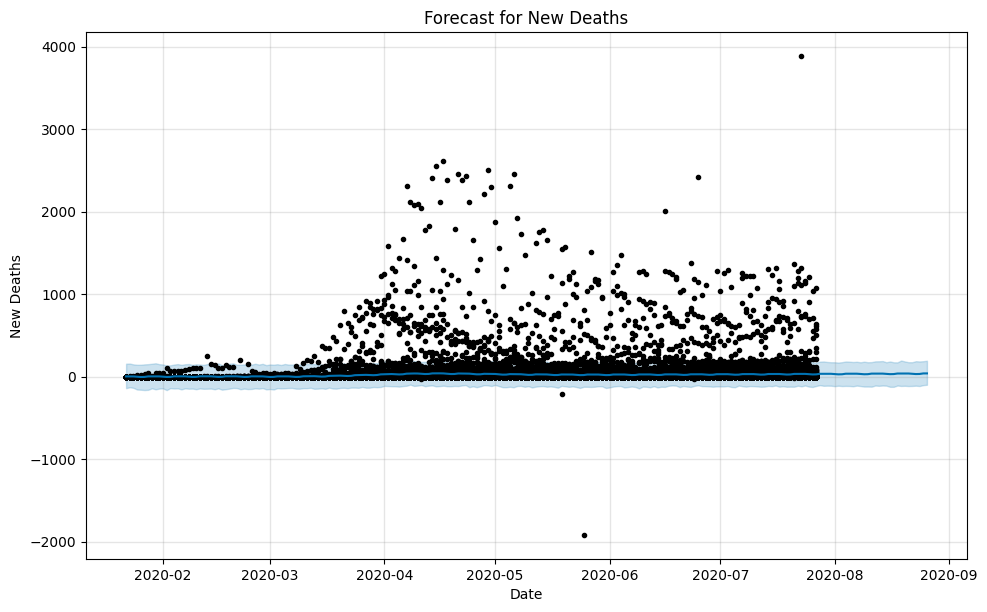

In [ ]:
future_dates_new_deaths = new_deaths_model.make_future_dataframe(periods=30)
forecast_new_deaths = new_deaths_model.predict(future_dates_new_deaths)
new_deaths_model.plot(forecast_new_deaths)
plt.title("Forecast for New Deaths")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.show()

In [ ]:
# FOR CLASSIFICATION ANALYSYS
# First we Display Covid19 Second Dataset for viewing
Covid19_First_Dataset.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Mortality Ratio,PotentialCaseDensity
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2.576668e+06,1706.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,0.032353,0.015194
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2.047660e+06,1706.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,0.033810,0.013716
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1.377384e+06,1706.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,0.020558,0.001466
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,6.763570e+05,1706.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,0.016752,0.005974
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,3.873160e+05,1706.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,0.017845,0.009063
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,3.088480e+05,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas,0.109181,0.003585
6,Peru,South America,3.301632e+07,455409,0.0,20424.0,0.0,3.103370e+05,1706.0,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas,0.044848,0.013793
7,Chile,South America,1.913251e+07,366671,0.0,9889.0,0.0,3.401680e+05,1706.0,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas,0.026970,0.019165
8,Colombia,South America,5.093626e+07,357710,0.0,11939.0,0.0,1.923550e+05,1706.0,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas,0.033376,0.007023
9,Spain,Europe,4.675665e+07,354530,0.0,28500.0,0.0,5.887898e+04,1706.0,0.0,617.0,7582.0,610.0,7064329.0,151087.0,Europe,0.080388,0.007582


In [ ]:
X_continent = Covid19_First_Dataset[['PotentialCaseDensity', 'Serious,Critical', 'TotalTests','Deaths/1M pop','Tests/1M pop']]
y_continent = Covid19_First_Dataset['Continent']
X_train_continent, X_test_continent, y_train_continent, y_test_continent = train_test_split(X_continent, y_continent, test_size=0.2, random_state=42)
dt_model_continent = DecisionTreeClassifier(random_state=42)
dt_model_continent.fit(X_train_continent, y_train_continent)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_continent = dt_model_continent.predict(X_test_continent)
print("Decision Tree - Continent Classification:")
print(confusion_matrix(y_test_continent, y_pred_continent))
print(classification_report(y_test_continent, y_pred_continent))

Decision Tree - Continent Classification:
[[6 2 0 0 0 0]
 [4 1 0 4 1 0]
 [0 0 0 0 1 1]
 [1 1 0 8 3 1]
 [0 0 1 2 1 0]
 [1 1 0 0 2 0]]
                   precision    recall  f1-score   support

           Africa       0.50      0.75      0.60         8
             Asia       0.20      0.10      0.13        10
Australia/Oceania       0.00      0.00      0.00         2
           Europe       0.57      0.57      0.57        14
    North America       0.12      0.25      0.17         4
    South America       0.00      0.00      0.00         4

         accuracy                           0.38        42
        macro avg       0.23      0.28      0.25        42
     weighted avg       0.35      0.38      0.35        42



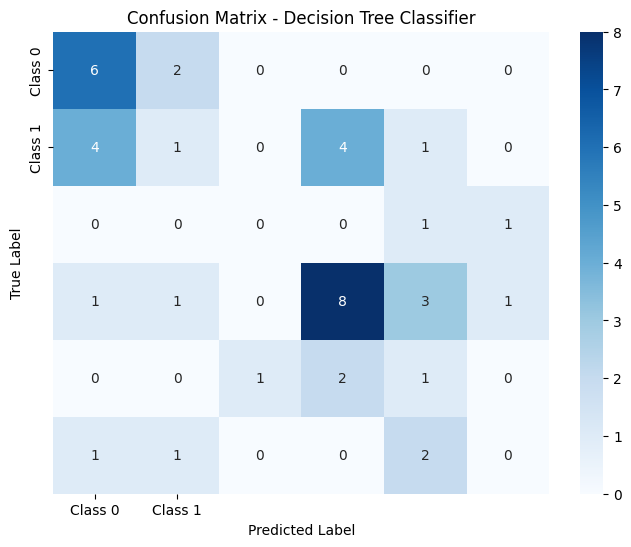

In [ ]:
y_pred_continent_dt = dt_model_continent.predict(X_test_continent)
conf_matrix_dt = confusion_matrix(y_test_continent, y_pred_continent_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


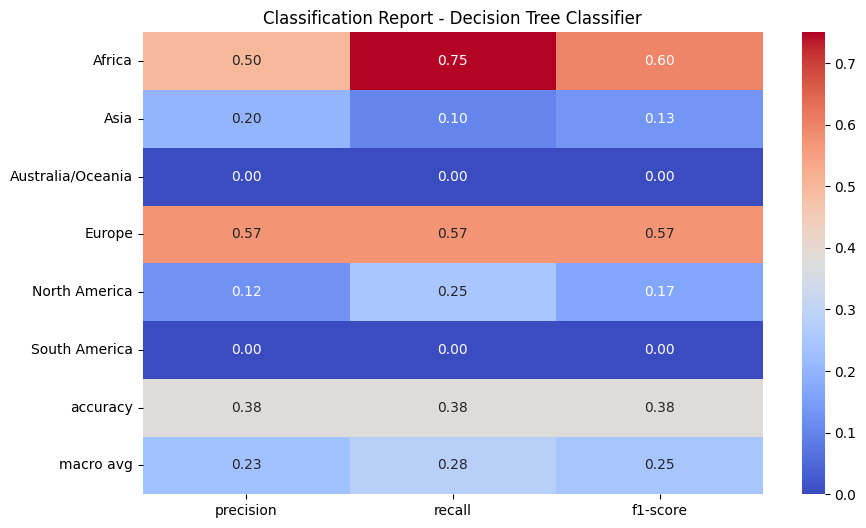

In [ ]:
report_dt = classification_report(y_test_continent, y_pred_continent_dt, output_dict=True)
report_df_dt = pd.DataFrame(report_dt).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_dt.iloc[:-1, :-1].astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report - Decision Tree Classifier')
plt.show()

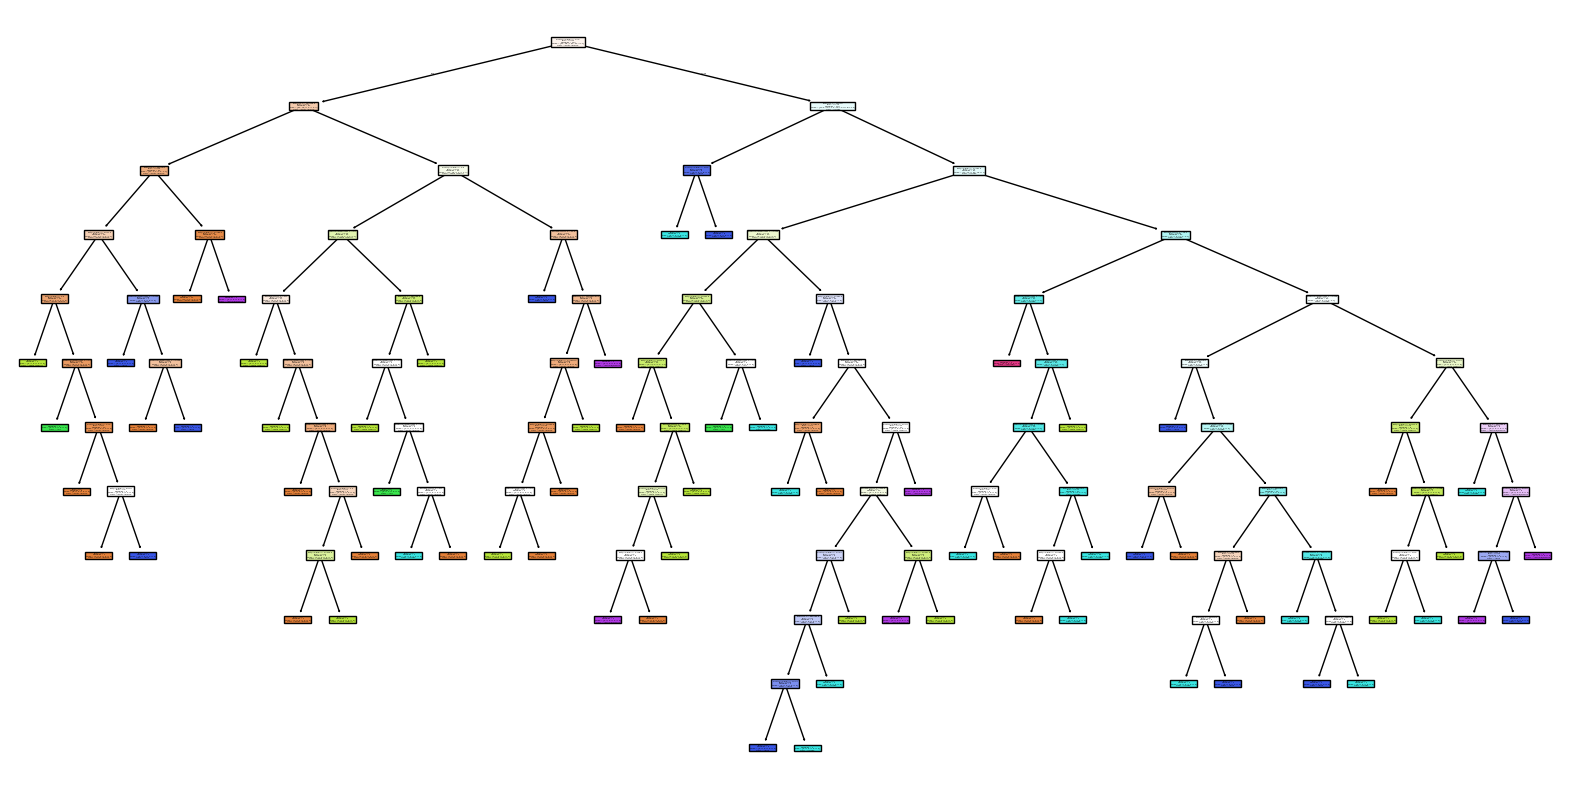

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model_continent, feature_names=X_continent.columns, class_names=list(y_continent.unique()), filled=True)
plt.show()

In [ ]:
rf_model_continent = RandomForestClassifier(random_state=42)
rf_model_continent.fit(X_train_continent, y_train_continent)



RandomForestClassifier(random_state=42)

In [ ]:
y_pred_continent_rf = dt_model_continent.predict(X_test_continent)
print("Random Forest - Continent Classification:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_continent, y_pred_continent_rf))
print("Classification Report:")
print(classification_report(y_test_continent, y_pred_continent_rf))

Random Forest - Continent Classification:
Confusion Matrix:
[[6 2 0 0 0 0]
 [4 1 0 4 1 0]
 [0 0 0 0 1 1]
 [1 1 0 8 3 1]
 [0 0 1 2 1 0]
 [1 1 0 0 2 0]]
Classification Report:
                   precision    recall  f1-score   support

           Africa       0.50      0.75      0.60         8
             Asia       0.20      0.10      0.13        10
Australia/Oceania       0.00      0.00      0.00         2
           Europe       0.57      0.57      0.57        14
    North America       0.12      0.25      0.17         4
    South America       0.00      0.00      0.00         4

         accuracy                           0.38        42
        macro avg       0.23      0.28      0.25        42
     weighted avg       0.35      0.38      0.35        42



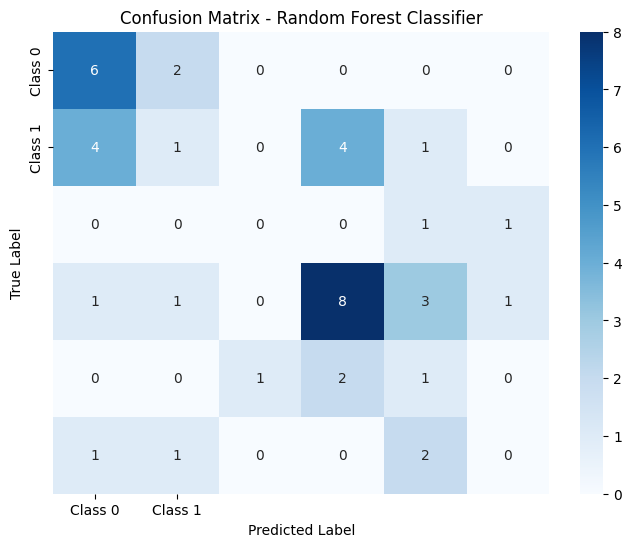

In [ ]:
conf_matrix_rf = confusion_matrix(y_test_continent, y_pred_continent_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


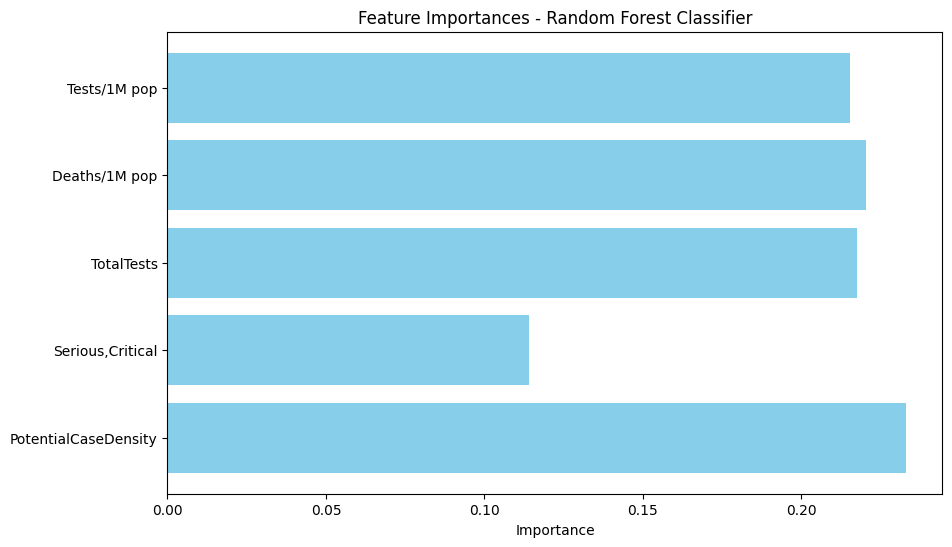

In [ ]:
feature_importances = rf_model_continent.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train_continent.columns, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - Random Forest Classifier')
plt.show()

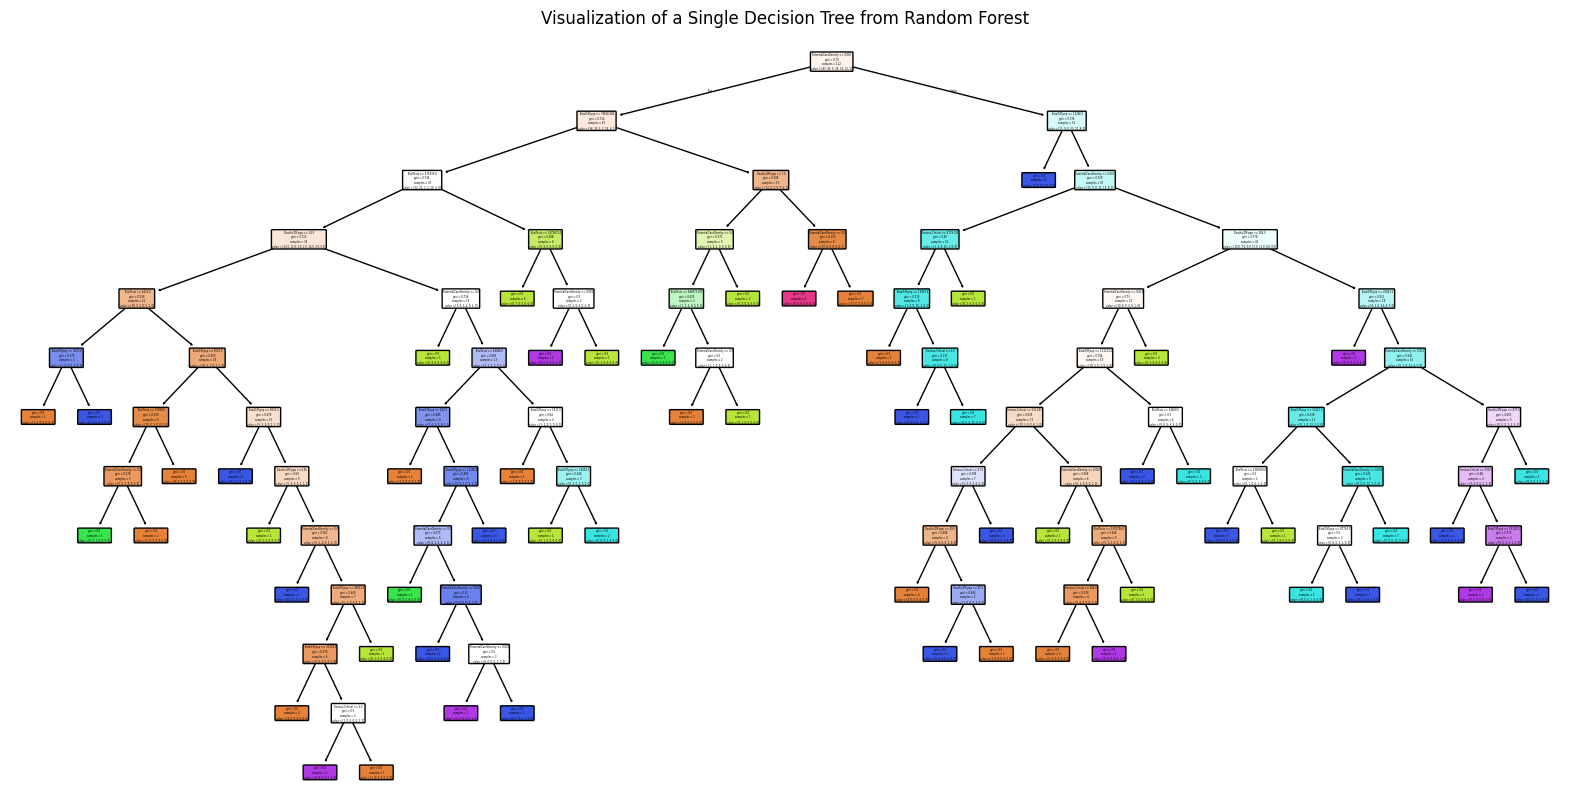

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model_continent.estimators_[0], feature_names=X_train_continent.columns, filled=True, rounded=True)
plt.title('Visualization of a Single Decision Tree from Random Forest')
plt.show()

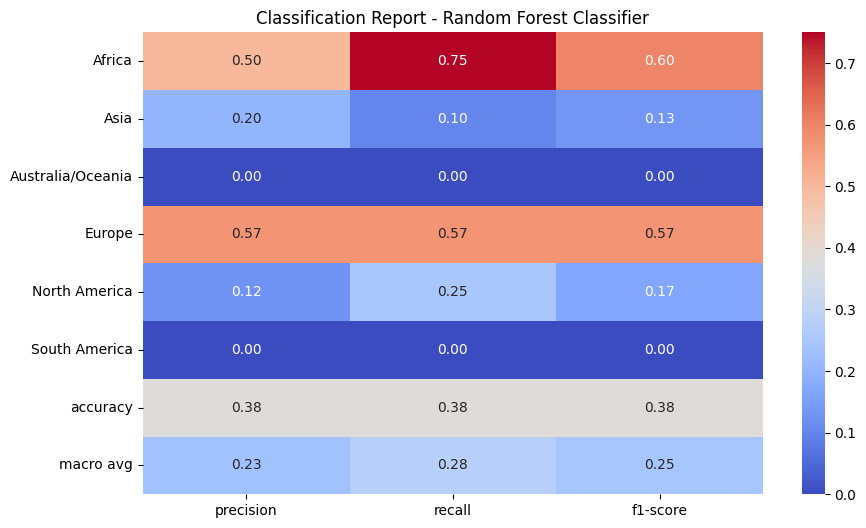

In [ ]:
report_rf = classification_report(y_test_continent, y_pred_continent_rf, output_dict=True)
report_df_rf = pd.DataFrame(report_rf).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df_rf.iloc[:-1, :-1].astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report - Random Forest Classifier')
plt.show()
